# Oddities With OLS
- Predicting out of sample where 
$$\sigma^2\_y\_in  \gt \sigma^2\_y\_out$$
- Banded Out of Sample Resisduals

In [294]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

## Out of sample R^2 exceeds that of insample
This can occur when the in and out of sample outcomes have the same mean, but the out of sample variance is lower.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 2.216e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:37:54   Log-Likelihood:                -53319.
No. Observations:               10000   AIC:                         1.066e+05
Df Residuals:                    9999   BIC:                         1.066e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.9282      0.047    148.852      0.000       6.837       7.019
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.134
Skew:                          -0.007   Prob(JB):                        0.935
Kurtosis:                       2.988   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

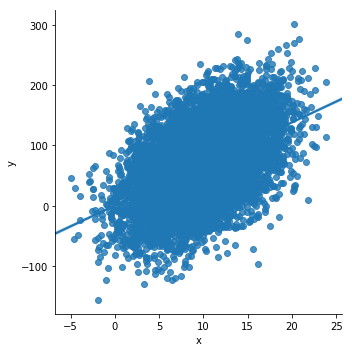

In [428]:
df = pd.DataFrame()
x = 'x'
y = 'y'
smp = 'sample'

n = 10000
x_mu = 10
x_sigma_2 = 4
resid_mu = 0
resid_sigma_2 = 50
beta_truth = 7

df[x] = stats.norm.rvs(x_mu, x_sigma_2, n)
df[y] = beta_truth*df[x] + stats.norm.rvs(resid_mu, resid_sigma_2, n)
df[smp] = 'in'

sns.lmplot(x, y, df)

res = sm.OLS(df[y], df[x]).fit()
res.summary()

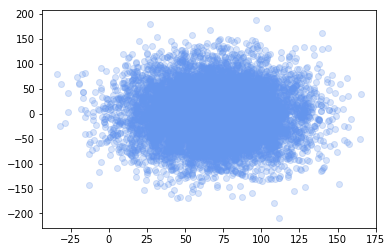

In [429]:
plt.scatter(res.fittedvalues, res.resid, color='cornflowerblue', alpha=.25)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.204e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:38:13   Log-Likelihood:                -11629.
No. Observations:                2500   AIC:                         2.326e+04
Df Residuals:                    2499   BIC:                         2.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y_hat          1.0121      0.007    148.473      0.000       0.999       1.025
==============================================================================
Omnibus:                        0.914   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.971
Skew:                          -0.029   Prob(JB):                        0.615
Kurtosis:                       2.923   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

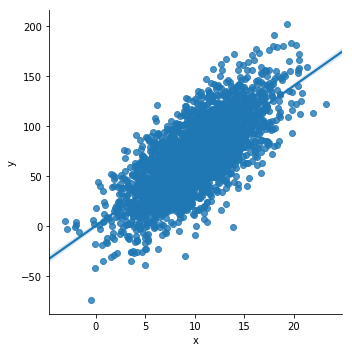

In [430]:
do = pd.DataFrame()
y_hat = 'y_hat'

os_fraction = 0.25
n_os = int(n*os_fraction)

resid_sigma_2_frac = 0.5
resid_sigma_2_os = resid_sigma_2 * resid_sigma_2_frac

do[x] = stats.norm.rvs(x_mu, x_sigma_2, n_os)
do[y] = beta_truth*do[x] + stats.norm.rvs(resid_mu, resid_sigma_2_os, n_os)
do[y_hat] = res.predict(do[x])

do[smp] = 'out'

sns.lmplot(x, y, do)
res_os = sm.OLS(do[y], do[y_hat]).fit()
res_os.summary()

In [438]:
print(f'Insample r^2 {np.round(res.rsquared, 2)}, out of sample r^2 {np.round(res_os.rsquared, 2)} where out of sample data has a fraction, {resid_sigma_2_frac}, of in sample variance.')

Insample r^2 0.71, out of sample r^2 0.9 where out of sample data has a fraction, 0.5, of in sample variance.


## Out of Sample Residuals - banding
Residual banding occurs when an often repeated value of y is associated with monotonic values of x. This results in the resiudals being a linear function of x.

In [432]:
dr = pd.DataFrame()

y_mean = x_mu * beta_truth
n_bands = 4
y_vals = [yy for yy in np.linspace(y_mean-resid_sigma_2, y_mean+resid_sigma_2, n_bands)]

n_resid = int(n/5)
window = .99
for y_val in y_vals:
    dy = pd.DataFrame()
    dy[y] = [y_val for ii in range(n_resid)]
    dy[x] = np.linspace(x_mu-x_sigma_2, x_mu, int(n_resid/2)).tolist()+np.linspace(x_mu, x_mu+x_sigma_2, int(n_resid/2)).tolist()
    dy[smp] = 'rep'
    dr = pd.concat([dr, dy])

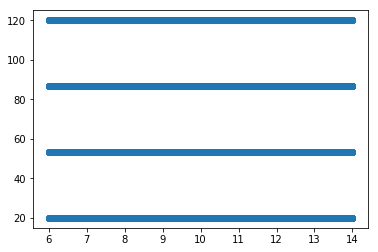

In [433]:
plt.scatter(dr[x], dr[y])

In [434]:
dc = pd.concat([df, dr])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 4.369e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:38:21   Log-Likelihood:                -94478.
No. Observations:               18000   AIC:                         1.890e+05
Df Residuals:                   17999   BIC:                         1.890e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.8090      0.033    209.015      0.000       6.745       6.873
==============================================================================
Omnibus:                       20.259   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.498
Skew:                          -0.009   Prob(JB):                     0.000159
Kurtosis:                       2.848   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

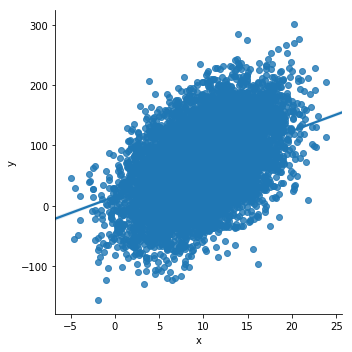

In [435]:
sns.lmplot(x, y, dc)

res = sm.OLS(dc[y], dc[x]).fit()
res.summary()

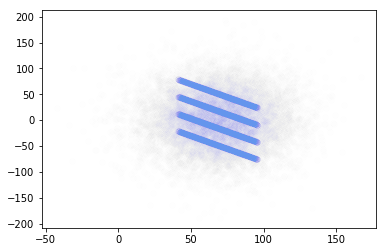

In [427]:
plt.scatter(res.fittedvalues, res.resid, color='cornflowerblue', alpha=.005)

Banding occurs when for a fixed value of y, x is monotonic. If this occurs for a single value of y, a straight line will occur in your resiudals. If this occurs for multiple values of y, with the same monotonic value in x space, bands will occur in your residuals. Because x space is monotonic and fixed, the line has the same gradient for multiple y values, they are parallel.